# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [46]:
from commonfunctions import *
import skimage.io as io
from skimage.color import rgb2gray,rgba2rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

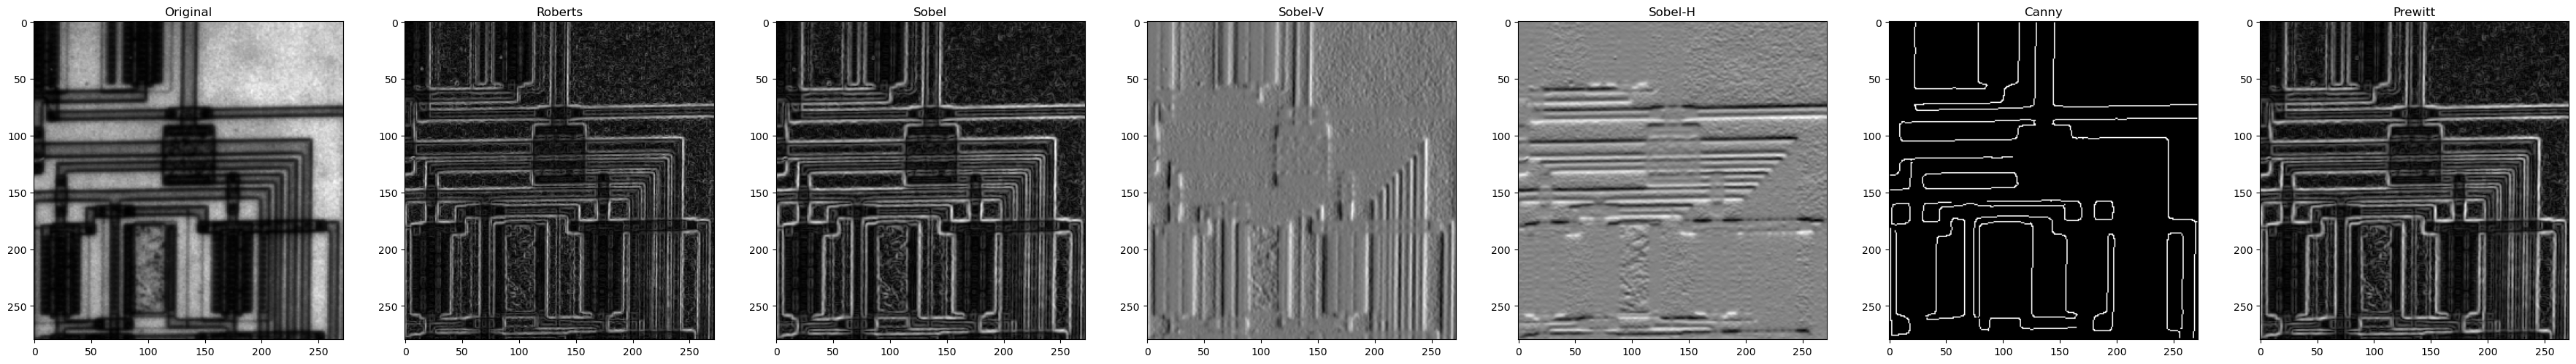

In [48]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = (io.imread('circuit.tif'))

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_sobel_v = sobel_v(img)
edge_sobel_h = sobel_h(img)
edge_canny = canny(img,sigma =2, low_threshold=1, high_threshold=100)

                 
edge_prewitt = prewitt(img)
show_images([img,edge_roberts,edge_sobel,edge_sobel_v,edge_sobel_h,edge_canny,edge_prewitt],["Original","Roberts","Sobel","Sobel-V","Sobel-H","Canny","Prewitt"])


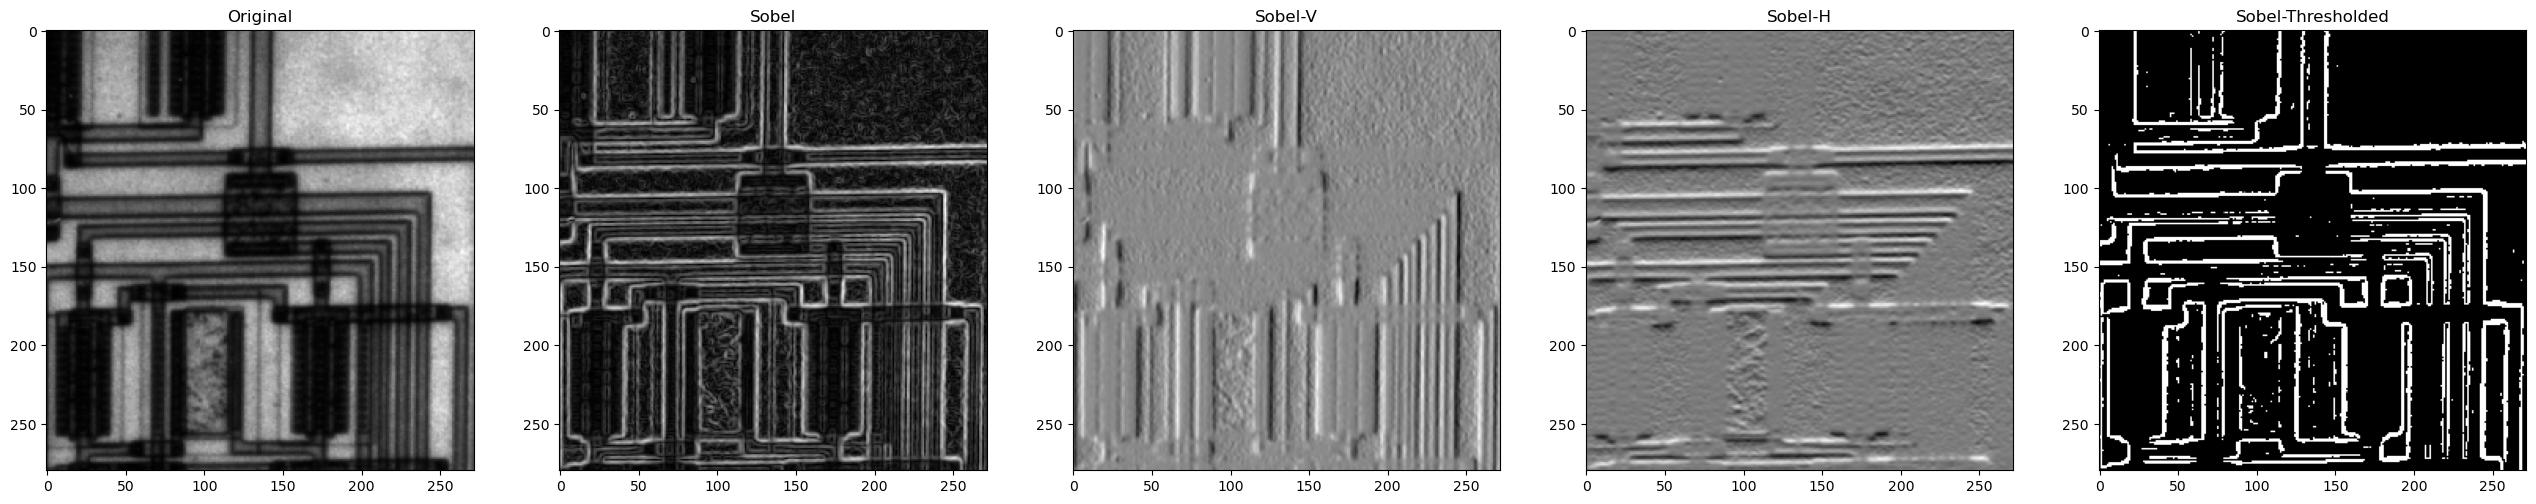

In [64]:
# 2. Custom Sobel (V-H-Both)

def sobel_custom(img,threshold=100):
    sobel_v = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])
    
    sobel_h = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])
    
    edge_sobel_v = convolve2d(img, sobel_v, mode='same', boundary='symm', fillvalue=0)
    edge_sobel_h = convolve2d(img, sobel_h, mode='same', boundary='symm', fillvalue=0)
    edge_sobel = np.sqrt(edge_sobel_v**2 + edge_sobel_h**2)

    edge_sobel_thresholded = np.copy(edge_sobel) 
    edge_sobel_thresholded[edge_sobel_thresholded<threshold ] = 0
    edge_sobel_thresholded[edge_sobel_thresholded>threshold ] = 255
 
    return edge_sobel,edge_sobel_v,edge_sobel_h,edge_sobel_thresholded

edge_sobel_cust,edge_sobel_cust_v,edge_sobel_cust_h,edge_sobel_thresholded_cust=sobel_custom(img,120)
show_images([img,edge_sobel_cust,edge_sobel_cust_v,edge_sobel_cust_h,edge_sobel_thresholded_cust],["Original","Sobel","Sobel-V","Sobel-H","Sobel-Thresholded"])

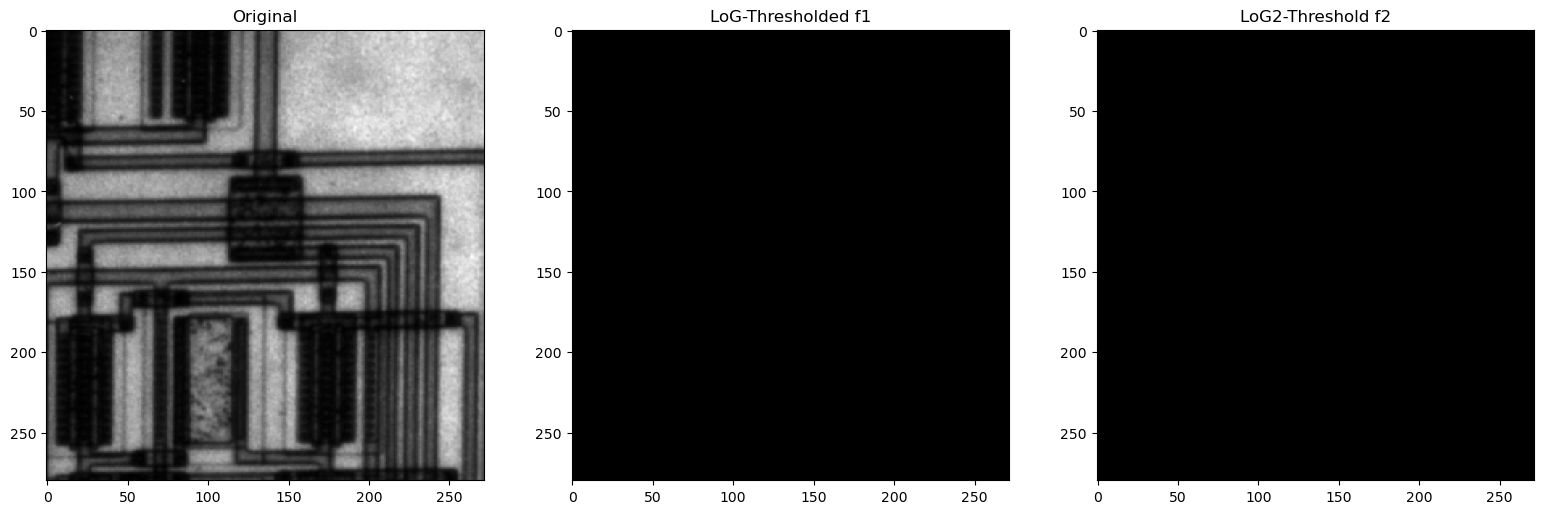

In [90]:
# 3. Custom LoG
thres= 2
sigma= 3
f1 = np.array([     [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]])

f2 = np.array([     [0, 1, 0], 
                    [1, -4, 1], 
                    [0, 1, 0]])

def LOG(img, filter, threshold=2, sigma=1):
    # Step 1: Apply Gaussian filter
    img = gaussian(img, sigma=sigma)
    
    # Step 2: Convolve the image with the given filter
    edge_log = convolve2d(img, filter, mode='same', boundary='symm', fillvalue=0)
    
    # Step 4: Detect zero crossings
    zero_crossings = np.zeros_like(edge_log, dtype=np.uint8)
    for i in range(1, edge_log.shape[0] - 1):
        for j in range(1, edge_log.shape[1] - 1):
            
            if ( (-threshold <edge_log[i-1, j] < 0 and threshold>edge_log[i+1, j] > 0 )or 
                (-threshold <edge_log[i+1, j] < 0 and threshold>edge_log[i-1, j] > 0 )or
                (-threshold <edge_log[i, j-1] < 0 and threshold>edge_log[i, j+1] > 0 )or
                (-threshold <edge_log[i, j+1] < 0 and threshold>edge_log[i, j-1] > 0 )):
                zero_crossings[i, j] = 255
            else:
                zero_crossings[i, j] = 0
 


    return edge_log, zero_crossings, 
edge_log,edge_log_thresholded=LOG(img,f1,thres,sigma)
edge_log2,edge_log_thresholded2=LOG(img,f2,thres,sigma)
show_images([img,edge_log_thresholded,edge_log_thresholded2],["Original","LoG-Thresholded f1","LoG2-Threshold f2"])

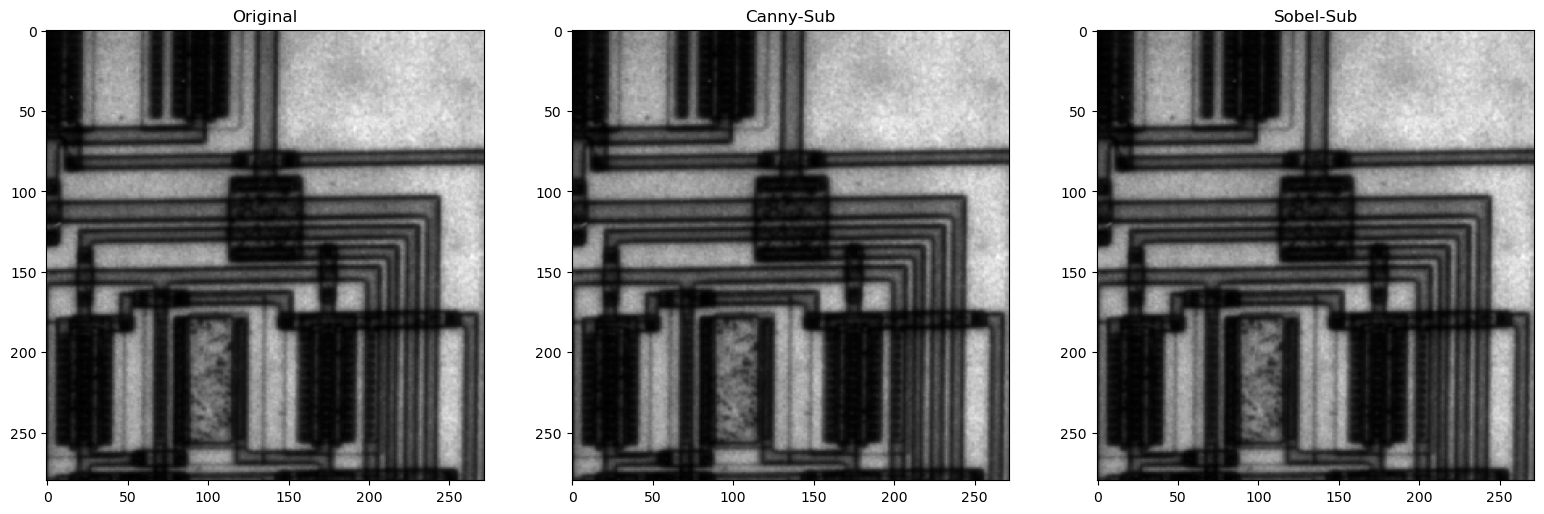

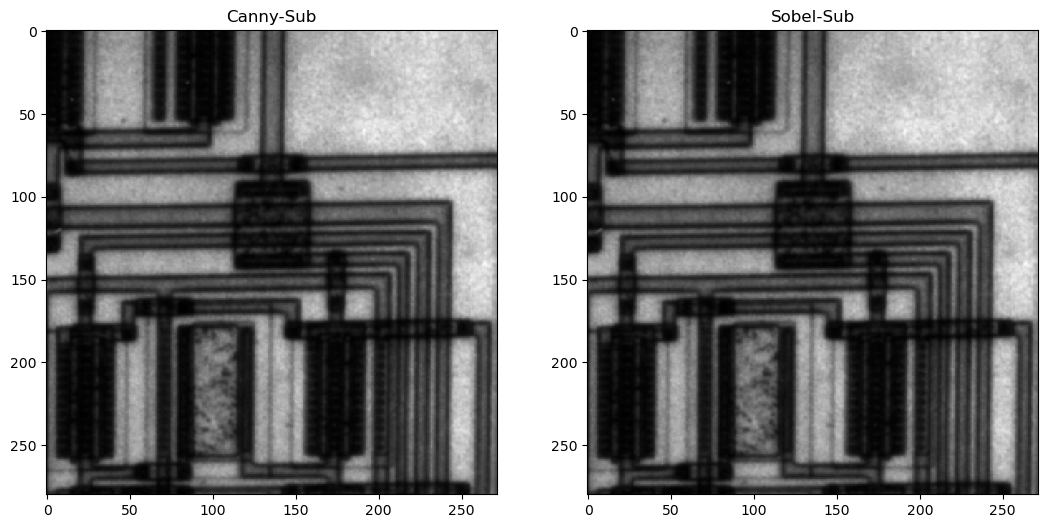

In [62]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

edge_canny_05_sub = img - np.copy(edge_canny)*0.5
edge_sobel_05_sub = img - np.copy(edge_sobel)*0.2
show_images([img,edge_canny_05_sub,edge_sobel_05_sub],["Original","Canny-Sub","Sobel-Sub"])
show_images([edge_canny_05_sub,edge_sobel_05_sub],["Canny-Sub","Sobel-Sub"])
